In [56]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Limits of diversification

Benefits of diversification:
1. Eliminating unrewarded idiosyncratic risks

Limits of diversification:
1. Diversification will fail you when you need it the most.
2. Almost by definition one cannot diversify away systematic risk.

Diversification versus Hedging
Advantage: Hedging is the only effective way to obtain downside protection
Disadvantage: The problem with Hedging is that inverstors give up on the upside at the same time as they give up on the downside

The main benefit of diversification is to deliver the highest reward per unit of risk across market conditions.  

Diversification allows investors to reduce specific risk within their portfolios, which is how they can achieve a high reward per unit of risk.  

Hedging versus Insurance

Benefits of Insurance:
1. Get downside protection while allowing for upside potential.

Insurance is Dynamic Hedging.
It is like an brake when driving a car when the road it not stright.


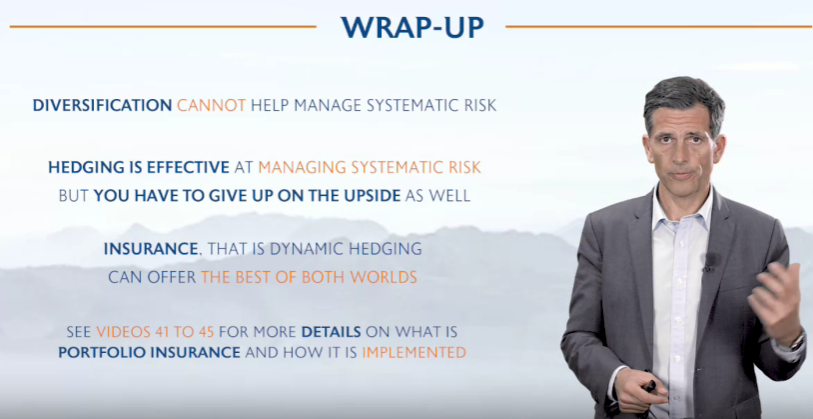

# Lab session- Limits of Diversification-Part1

In [57]:
ind_return=erk.get_ind_returns()
ind_nfirms=erk.get_ind_nfirms()
ind_size=erk.get_ind_size()

In [58]:
ind_return.shape

(1110, 30)

In [59]:
ind_nfirms.shape

(1110, 30)

In [60]:
ind_size.shape
#To check load file properly

(1110, 30)

In [61]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [62]:
#compute capital marketlization
ind_mktcap=ind_nfirms*ind_size
ind_mktcap.shape

(1110, 30)

In [63]:
total_mktcap=ind_mktcap.sum(axis='columns')

<Axes: >

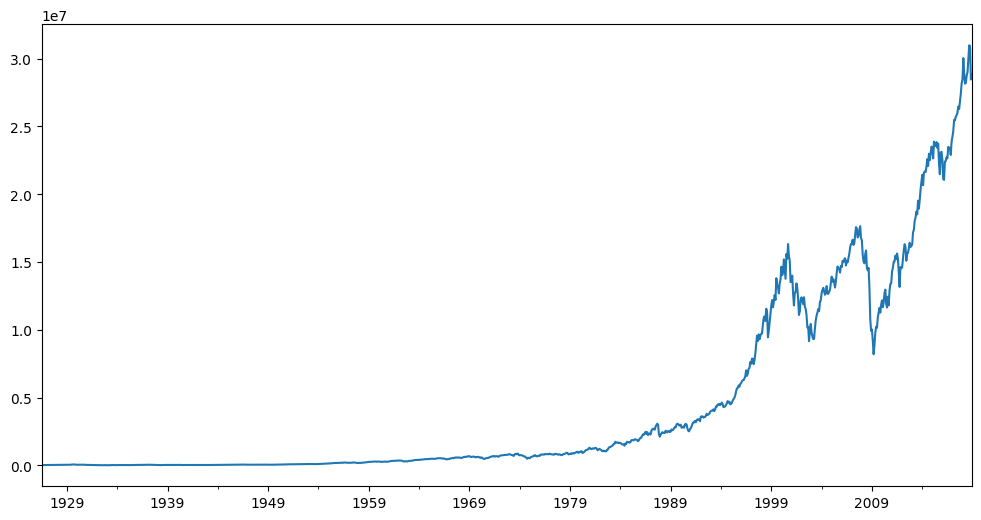

In [64]:
total_mktcap.plot(figsize=(12,6))
# When the crashes happen, the capitalization will lose a lot.

In [65]:
#Capitalization weight
ind_capweight=ind_mktcap.divide(total_mktcap, axis='rows')
#for every rows

In [66]:
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [67]:
ind_capweight['1926':'1926'].sum(axis='columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<Axes: >

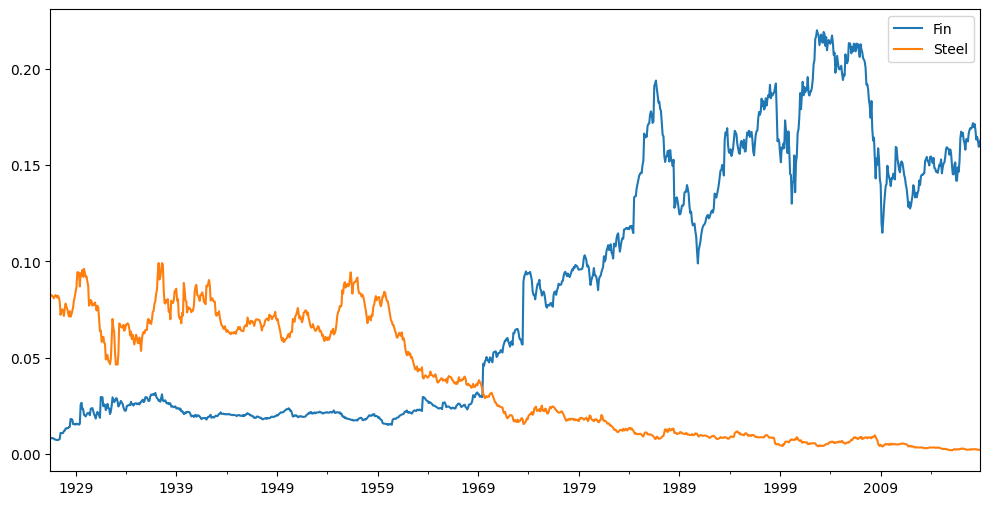

In [68]:
ind_capweight[['Fin','Steel']].plot(figsize=(12,6))
# Industry capweight trend

In [69]:
total_market_return=(ind_capweight*ind_return).sum(axis='columns')

<Axes: >

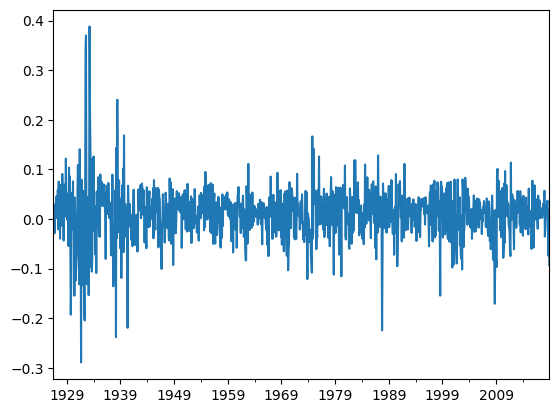

In [70]:
total_market_return.plot()

<Axes: title={'center': 'Total Market CapWeight Index 1926-2018'}>

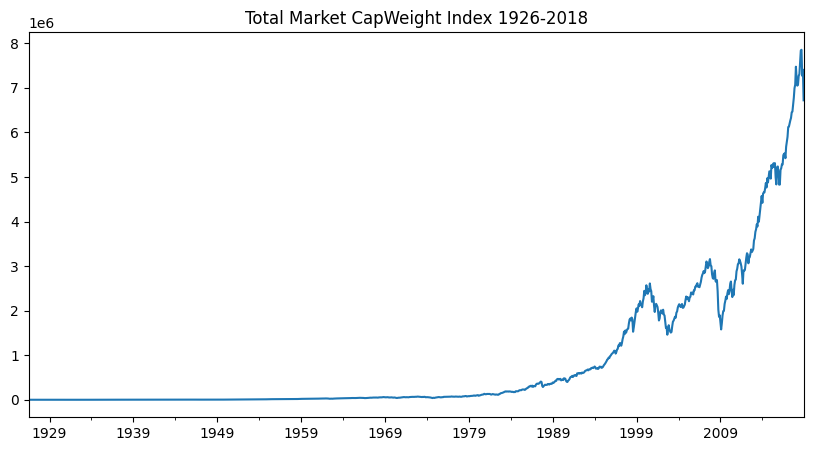

In [71]:
total_market_index=erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(10,5), title='Total Market CapWeight Index 1926-2018')

<Axes: >

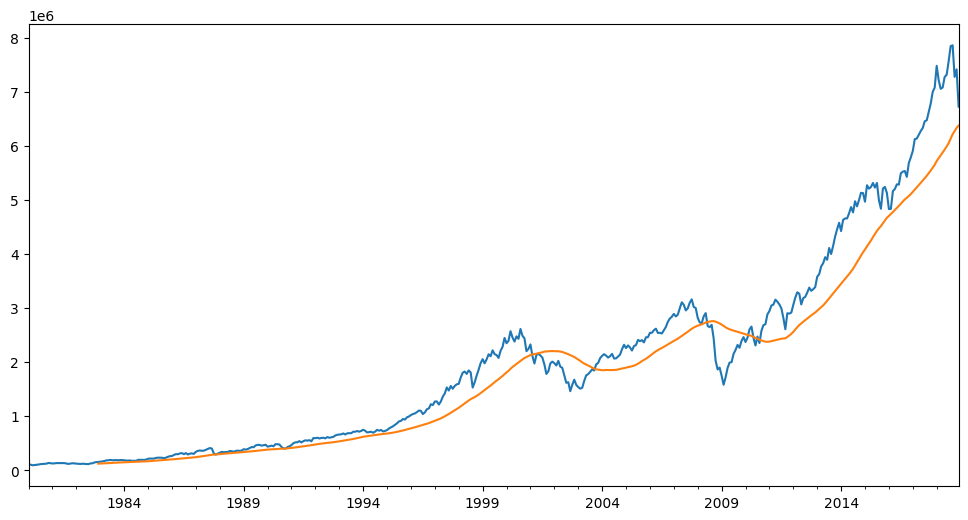

In [72]:
total_market_index['1980':].plot(figsize=(12,6))
total_market_index['1980':].rolling(window=36).mean().plot(figsize=(12,6))
# it gives 36 month windows（36 month moving average of the index）, which means 3 years (indicated in the orange line)

<Axes: >

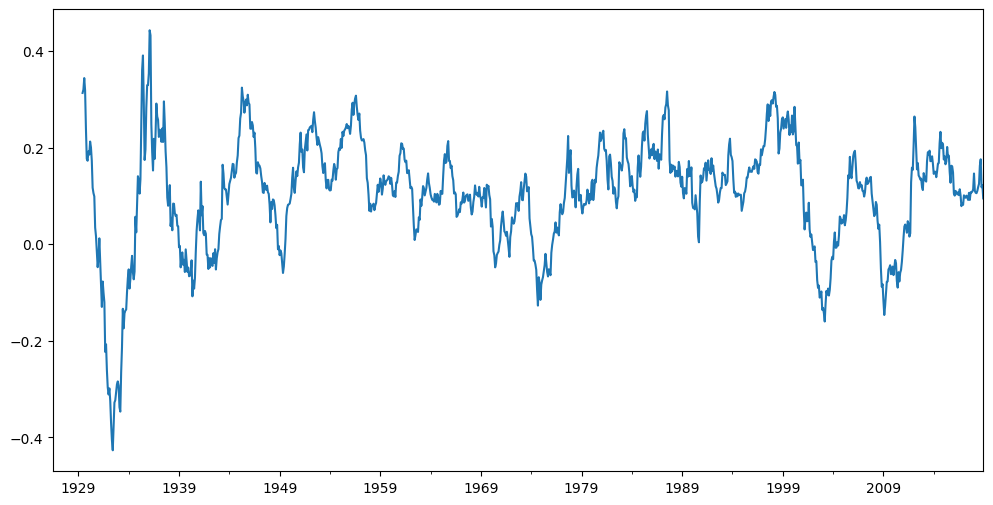

In [73]:
tmi_tr36rets=total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,6), label='Tr36 mo Return')
#total_market_return.plot(label='Returns', legend=True)

In [74]:
### Rolling correlation - along with MultiIndexes and .groupby
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()
# e.g. wholesale with 47.5% correlation with food in dec 2018, etc.

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [75]:
ind_return.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [76]:
ts_corr.index.names=['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [77]:
ind_tr36corr= ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())

<Axes: xlabel='date'>

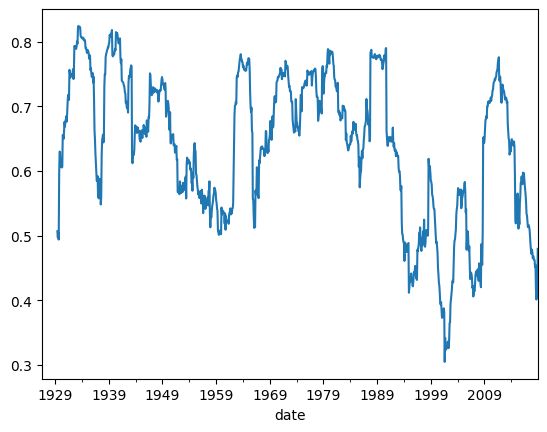

In [78]:
ind_tr36corr.plot()

<Axes: >

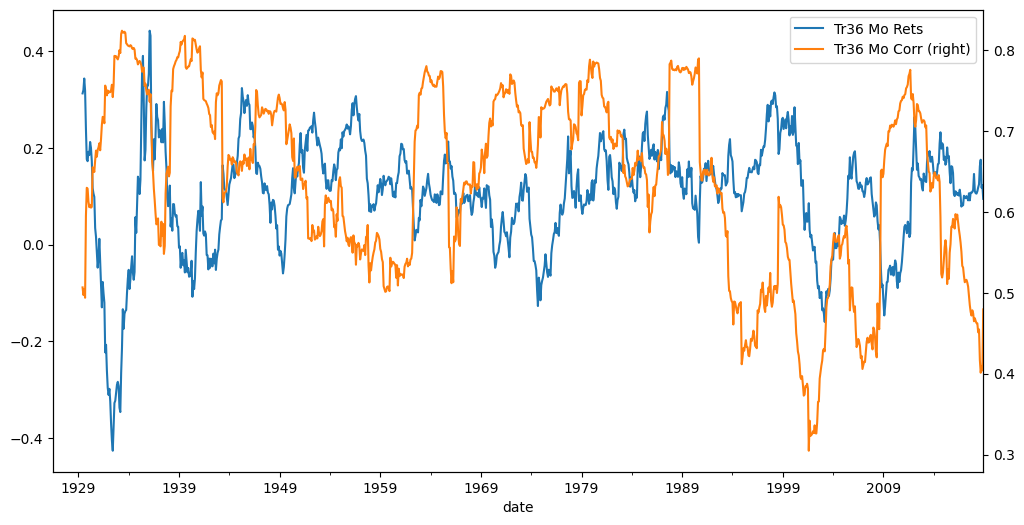

In [79]:
#total market index trailing 36 month returns
tmi_tr36rets.plot(label='Tr36 Mo Rets', figsize=(12,6), legend=True)
ind_tr36corr.plot(label='Tr36 Mo Corr', legend=True, secondary_y=True)
# When the market decreasing, the correlation is rising

<Axes: >

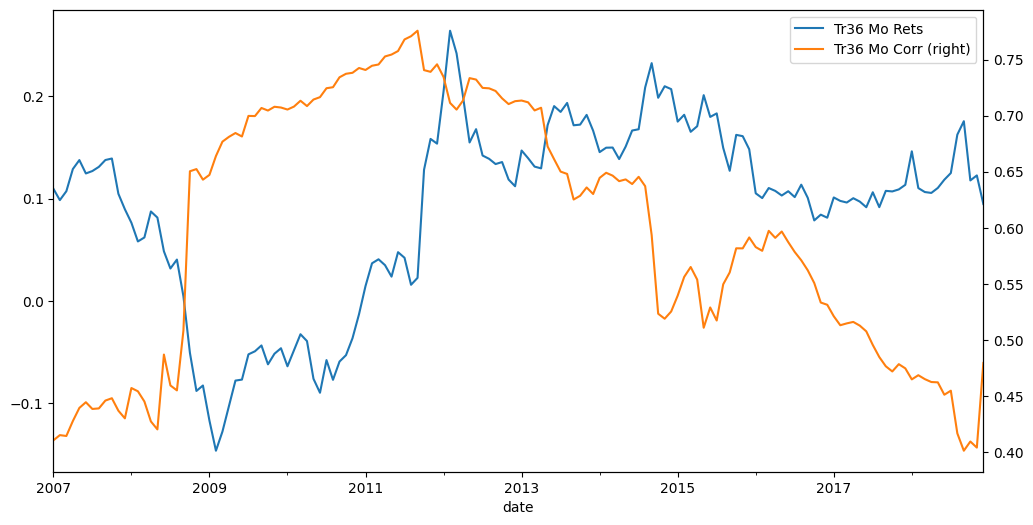

In [80]:
#total market index trailing 36 month returns
tmi_tr36rets['2007':].plot(label='Tr36 Mo Rets', figsize=(12,6), legend=True)
ind_tr36corr['2007':].plot(label='Tr36 Mo Corr', legend=True, secondary_y=True)


In [81]:
tmi_tr36rets.corr(ind_tr36corr)
# Diversification cannot help when the market is crashing
# This is correlation between the returns and the average correlation with 36 months

-0.28010065062884

An introduction to CPPI - Part 1

#Constant Proportion Portfolio Insurance

It allows for the construction of convex payoffs.

This procedure Dynamically Allocates Total Assets to a Risk Asset amd a Safe Asset

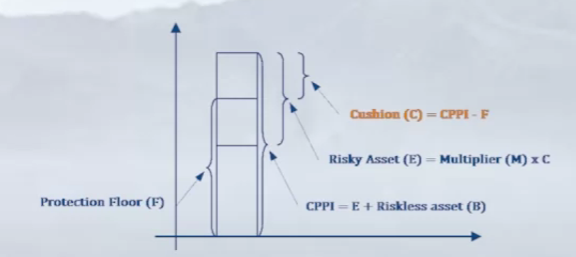

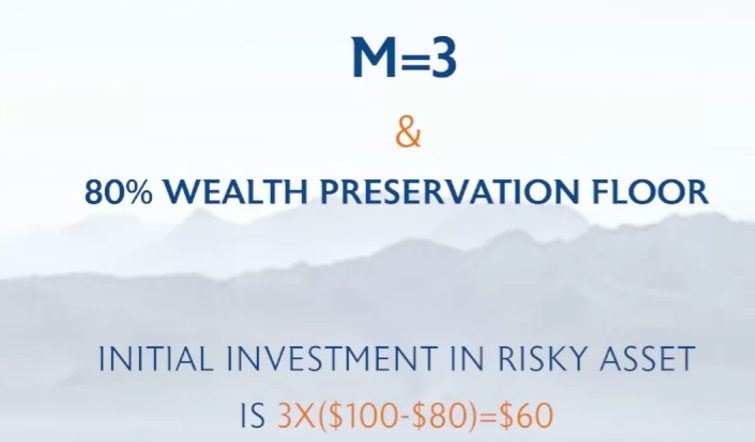

What is the initial allocation to the risky asset with a multiplier equal to 4 and a wealth preservation floor set at 90%?    

A: Initial investment in risky asset is 4x(100%-90%)=40%.

Gap risk materializeds if and only if the Loss on the risky portfolio relative to the safe portfolio exceeds 1/M within the trading interval.

Assume a drop of 20% of the risky asset. Which one of these multiplier values would lead to a violation of the floor.

A: With m=6, the largest drop of portfolio value that does not lead to a violation of the floor is 1/6<20%, so a violation will occur in this case.    

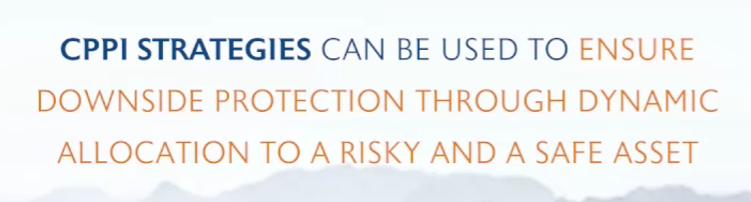

Max DD constraints


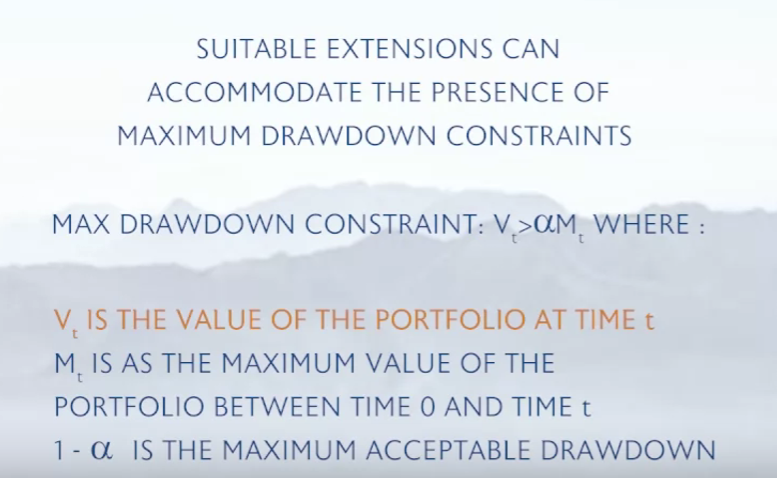

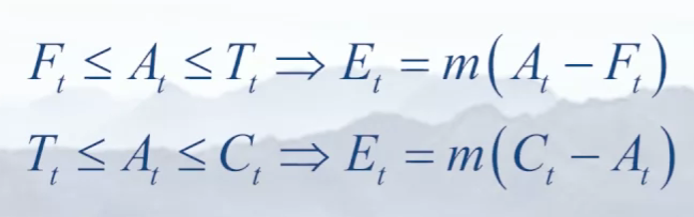

F=floor, A=Asset, C=Cap, T=Threshold

What is the initial allocation to the risky asset for a portfolio starting at $100, with a multiplier equal to 4, a wealth preservation floor set at 90% and a cap set at 105%? 

The portfolio initial value is closer to the cap than it is to the floor. In this case, the investment in risky asset is 4x(105%-100%)=20%.

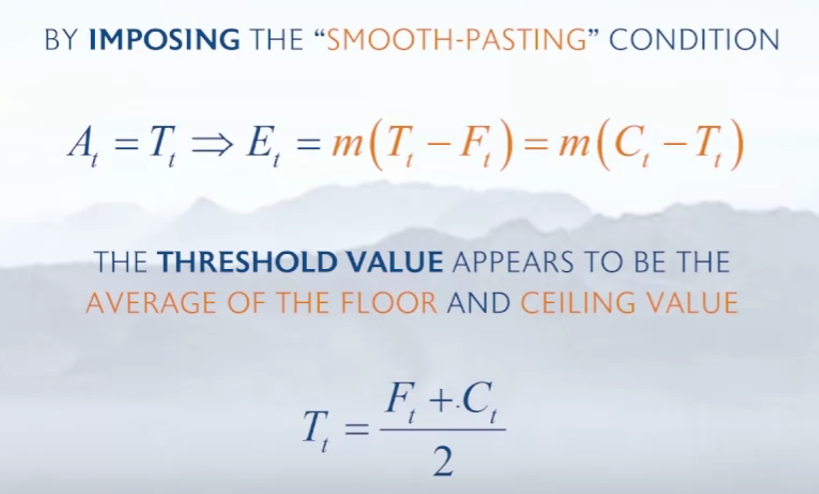

Consider a portfolio starting at $100, with a multiplier equal to 4, a wealth preservation floor set at 90% and a cap set at 105%. What is the threshold value beyond which the allocation to risky asset is computed with respect to the cap, and not to the floor?

Threshold level is equal to (90%+105%)/2=97.5%.    

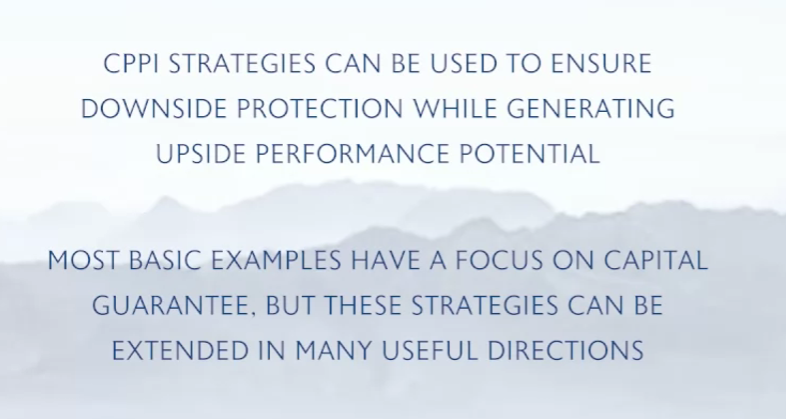

Lab session-CPPI and Drawdown Constraints-Part1

#Implementing Portfolio Insurance CPPI and Drawdown Constraints

In [82]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

#load the industry returns and the total market index previously created
ind_return =erk.get_ind_returns()
tmi_return=erk.get_total_market_index_returns()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
risky_r=ind_return['2000':][['Steel', 'Fin', 'Beer']]
# Safe Asset

In [84]:
risky_r.shape

(228, 3)

In [85]:
safe_r=pd.DataFrame().reindex_like(risky_r)

In [86]:
safe_r.shape

(228, 3)

In [87]:
safe_r[:]=0.03/12
start=1000
floor=0.8


#1. Compute Cushion - (Asset Value minus Floor Value)

#2. Compute an allocation to Safe and Risky Assets --> M*risk budget

#3. Recompute the Asset Value based on the returns


In [88]:
def compound1(r):
    return (1+r).prod()-1

def compound2(r):
    return np.expm1(np.log1p(r).sum())

In [89]:
compound1(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [90]:
compound2(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [91]:
%timeit compound1(risky_r)

228 µs ± 9.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [92]:
%timeit compound2(risky_r)

213 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [93]:
###Back to CPPI

dates=risky_r.index
n_steps=len(dates)
account_value=start
floor_value=start*floor
m=3
account_history=pd.DataFrame().reindex_like(risky_r)
cushion_history=pd.DataFrame().reindex_like(risky_r)
risky_w_history=pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    cushion=(account_value-floor_value)/account_value
    risky_w=m*cushion
    # When the m*cushion more than 100% which means need to borrow money to invest
    # So putting the below two constraints to set the range between 0-1
    risky_w=np.minimum(risky_w,1) # no more than 1
    risky_w=np.maximum(risky_w,0) # no less than 0
    safe_w=1-risky_w
    risk_alloc=account_value*risky_w
    safe_alloc=account_value*safe_w
    #update the account value for this time step
    account_value=(risk_alloc*(1+risky_r.iloc[step]))+(safe_alloc*(1+safe_r.iloc[step]))
    #save the values so that I can look at the history and plot it etc.
    cushion_history.iloc[step]=cushion
    risky_w_history.iloc[step]=risky_w
    account_history.iloc[step]=account_value

In [94]:
account_history.head()

,Steel,Fin,Beer
2000-01,984.380000,974.480000,987.320000
2000-02,1023.292876,931.167544,922.971256
2000-03,1047.555176,998.187296,924.835988
2000-04,1042.079009,973.927479,939.993701
2000-05,1007.137753,1001.460033,991.145489


In [95]:
risk_wealth= start*(1+risky_r).cumprod()


<Axes: >

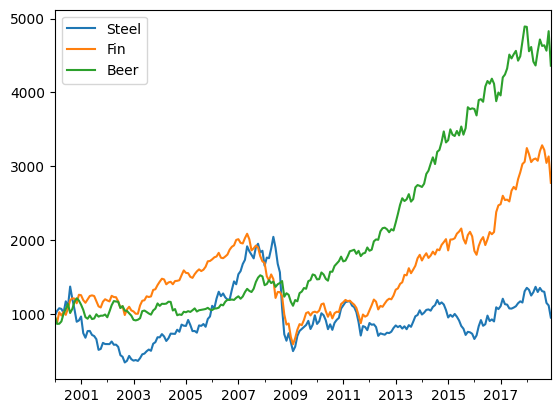

In [96]:
risk_wealth.plot()

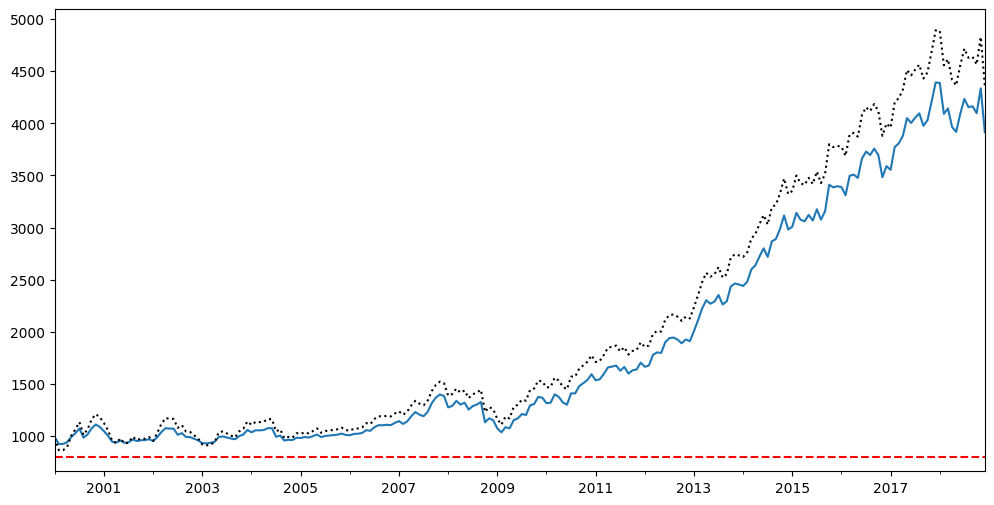

In [97]:
ax=account_history['Beer'].plot(figsize=(12,6))
risk_wealth['Beer'].plot(ax=ax, style='k:')
#Add a horizontal line across the Axes which is the floor
ax.axhline(y=floor_value,color='r', linestyle='--')

<Axes: >

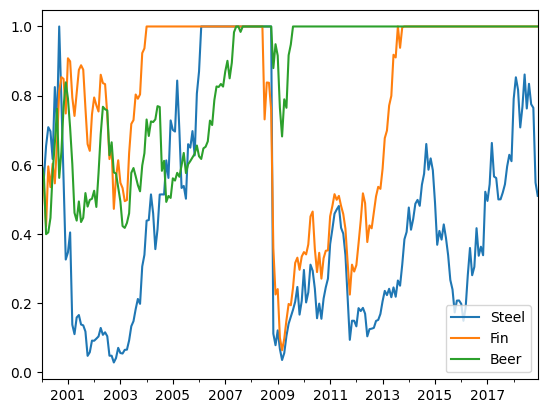

In [98]:
risky_w_history.plot()

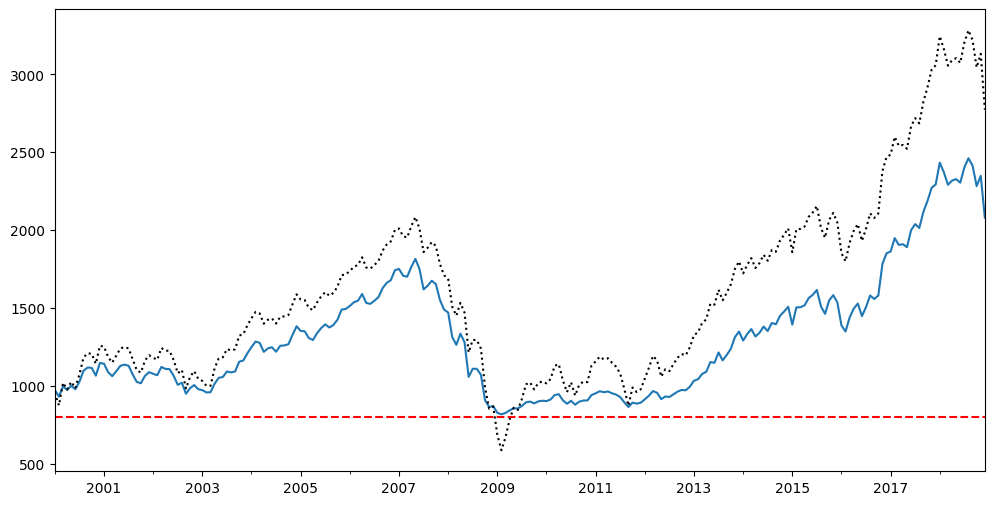

In [99]:
ind='Fin'
ax=account_history[ind].plot(figsize=(12,6))
risk_wealth[ind].plot(ax=ax, style='k:')
#Add a horizontal line across the Axes which is the floor
ax.axhline(y=floor_value,color='r', linestyle='--')

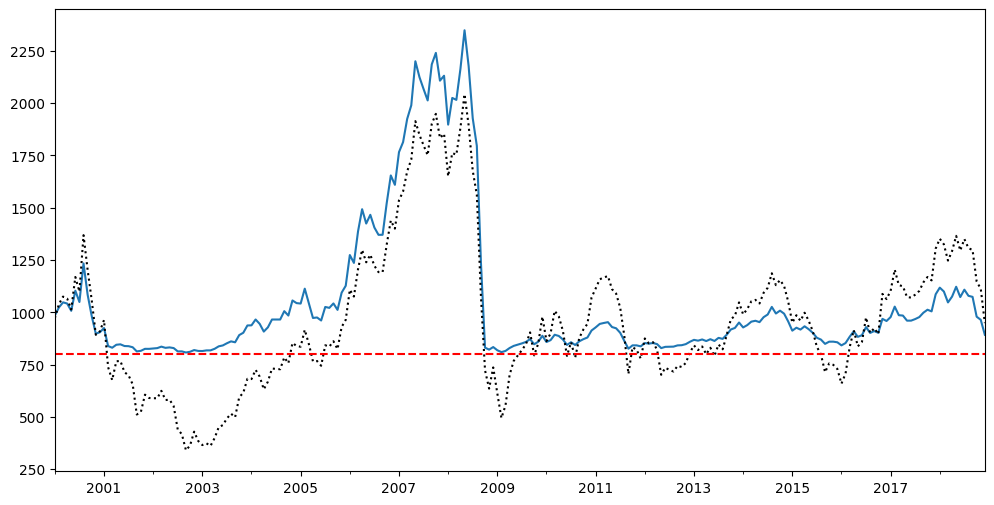

In [100]:
ind='Steel'
ax=account_history[ind].plot(figsize=(12,6))
risk_wealth[ind].plot(ax=ax, style='k:')
#Add a horizontal line across the Axes which is the floor
ax.axhline(y=floor_value,color='r', linestyle='--')

In [101]:
erk.summary_stats(risky_r)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.002790,0.312368,-0.326334,4.144381,0.150139,0.208117,-0.102567,-0.758017
Fin,0.055166,0.192909,-0.533218,4.995534,0.091224,0.132175,0.126718,-0.718465
Beer,0.080598,0.138925,-0.493545,4.173881,0.063015,0.091442,0.354314,-0.271368


In [102]:
btr=erk.run_cppi(risky_r)
erk.summary_stats(btr['Wealth'].pct_change().dropna()) #btr is backtest result

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.091995,0.130153,-0.196750,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.065535,0.091621,0.080352,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,0.074908,0.383772,-0.259582


<Axes: >

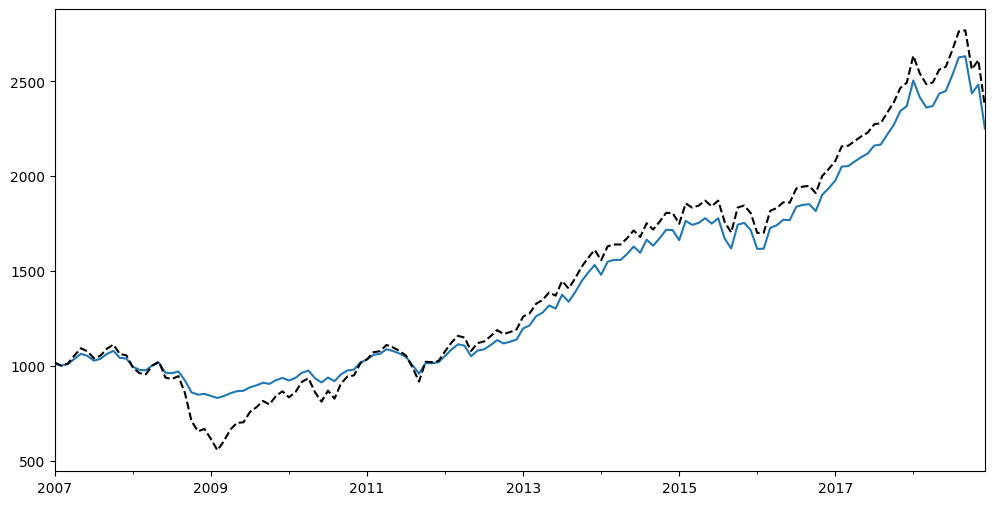

In [103]:
btr=erk.run_cppi(tmi_return['2007':])
ax=btr['Wealth'].plot(figsize=(12,6),legend=False)
btr['Risky Wealth'].plot(ax=ax, style='k--',legend=False)

In [104]:
erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.071592,0.096315,0.280618,-0.499943


In [105]:
erk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
R,0.069416,0.100381,-0.588292,3.740932,0.045678,0.062953,0.382052,-0.229683


In [106]:
# Drawdown constraint
btr= erk.run_cppi(ind_return['2007':][['Steel', 'Fin', 'Beer']], drawdown=0.25)

<Axes: >

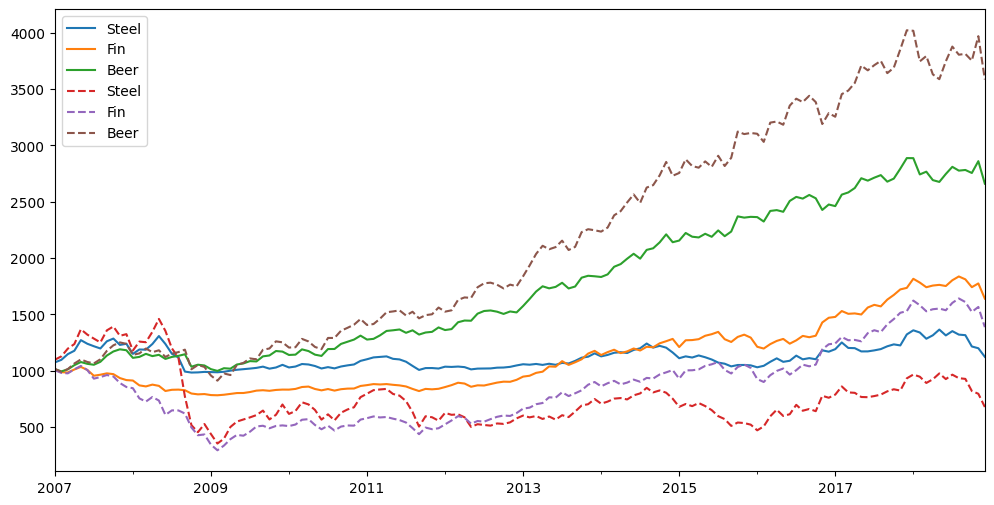

In [107]:
ax=btr['Wealth'].plot(figsize=(12,6))
btr['Risky Wealth'].plot(ax=ax, style='--')

In [108]:
erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.152288,0.203837,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.105744,0.149862,-0.012370,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.056497,0.077388,0.620132,-0.271368


In [109]:
erk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.441089,5.220481,0.047371,0.066991,-0.262958,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.038342,0.054111,0.136964,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.037937,0.051189,0.613413,-0.161186


In [110]:
# CPPI is the lot of downside protection
# It's has the lower drawdown to 24.8%

Simulating asset returns with random walks

A Stichastic model for asset returns

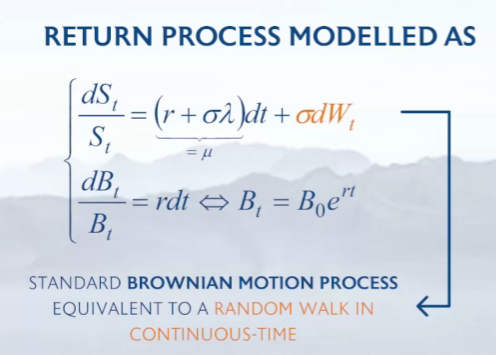

Brownian Motion

Introduced in 1900 by Louis Bachelier

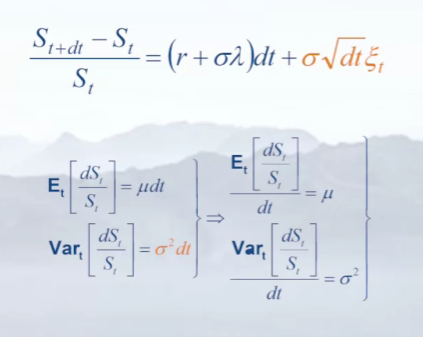

Follows a Normal Distribution with 0 mean and variance dt

μ is the Annualized Expected Return

σ (sigma) is the Annualized volatility 

If you estimate volatility of a portfolio return to be 2% over the monthly horizon, what would be your estimate for annual volatility?

The square-root of time scaling law implies that annual volatility is √12 times higher than monthly volatility. So the estimate for annual volatility is √12 x 2% = 6.9%. 

Brownian Motion used as a building blocks for Generating Scenarios for Stock Returns.